<a href="https://colab.research.google.com/github/Sweta-Das/TensorFlow-Python-Projects/blob/Fundamentals/loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss Function
- Also known as **Cost Function** or **Objective Function**.
- It is a mathematical function that quantifies the difference between the predicted output of a ML model and the actual target values.
- Its purpose is to measure how well or how poorly the model is performing, so that it can guide the training process of the model.

## Why loss function?
- Because it significantly impacts the model's performance and its ability to learn data patterns.

## Mathematical Representation
$\space \space \space \space \space \space \space L(y, ŷ)$ <br>
where, <br>
$y$ = true label <br>
$ŷ$ = predicted label <br>
$L$ = loss function <br>

### Demonstrating loss function in linear regression model

In [1]:
import numpy as np
import tensorflow as tf


In [2]:
# Creating a linear dataset "y = 2x + 1"

x_train = np.linspace(-1, 1, 100)[:, np.newaxis]
y_train = 2*x_train + 1 + np.random.normal(0, 0.1, x_train.shape)

In [3]:
top_5_x = x_train[:5]
top_5_y = y_train[:5]
print(f"Top 5 X-train:  \n{top_5_x}\n")
print(f"Top 5 Y-train: \n{top_5_y}")

Top 5 X-train:  
[[-1.        ]
 [-0.97979798]
 [-0.95959596]
 [-0.93939394]
 [-0.91919192]]

Top 5 Y-train: 
[[-0.89904905]
 [-1.12705446]
 [-0.88736323]
 [-0.78200532]
 [-0.90451902]]


In [4]:
# Simple neural network model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),   # Input layer with shape (1,)
    tf.keras.layers.Dense(units=1)   # Dense layer
])
model

<Sequential name=sequential, built=True>

- *`tf.keras.Input(shape=(1,))`*: It defines an explicit input layer with a shape of (1,), meaning the model expects input vectors with a single feature.
- *`tf.keras.layers.Dense(units=1)`*: It adds a dense layer with one unit, sufficient for a simple linear regression task.

In [5]:
# Compiling the model with Mean Squared Error (MSE) loss function and optimizer
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

This is model's architecture. <br>
The model is compiled using the `adam` optimizer and `mse` i.e., Mean Squared Error as the loss function. MSE is commonly used for regression as it measures the avg. of the squares of errors, penalizing larger errors more significantly.

In [6]:
# Training the model and plotting the loss during training
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=10,
                    verbose=1)
history

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9381  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8101 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6771 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6931 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8280 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6714 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9128 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7642 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4329 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5217 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5421 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7932 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3208 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6431 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

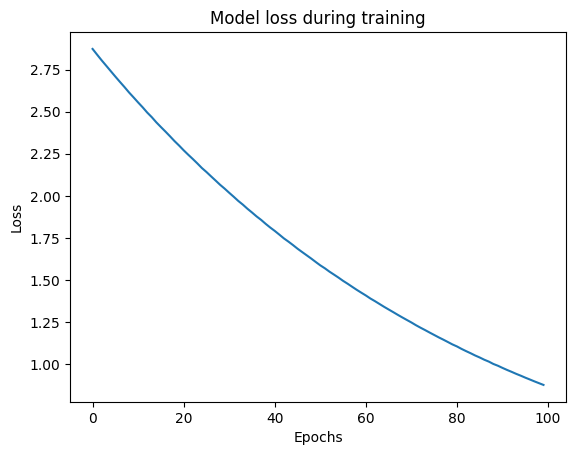

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss during training')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [8]:
# Making predictions using the trained model
y_pred = model.predict(x_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


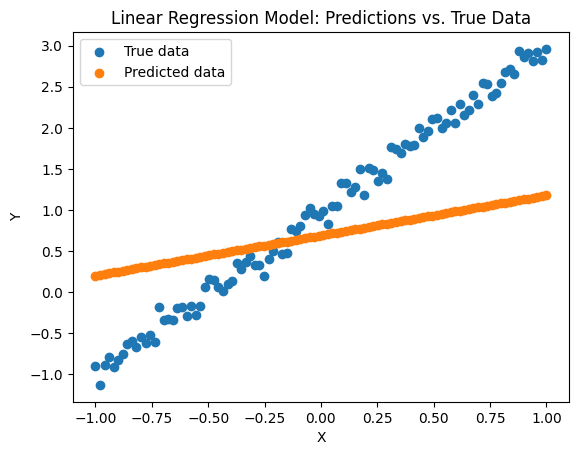

In [9]:
# Plotting the results
plt.scatter(x_train, y_train, label='True data')
plt.scatter(x_train, y_pred, label='Predicted data')
plt.title('Linear Regression Model: Predictions vs. True Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()